In [1]:
import sys
sys.path.append("..")

from model import VQModel

import torch

/home/andrew264/miniconda3/envs/torch-cuda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = VQModel().eval()

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

68718467

In [4]:
sd = torch.load('../weights/vqgan.ckpt', map_location='cpu', weights_only=True)['state_dict']
model.load_state_dict(sd, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['custom_layer.weight', 'custom_layer.bias'])

In [5]:
from model.vqgan.image_tokenizer import ImageTokenizer
tokenizer = ImageTokenizer(model)

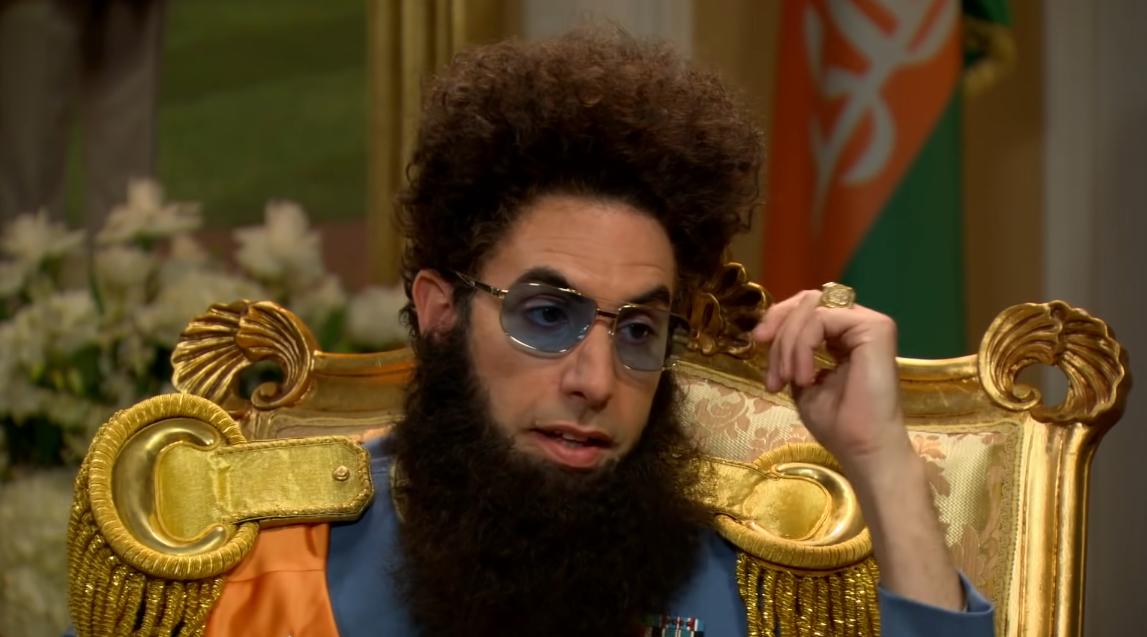

In [6]:
from PIL import Image
image = Image.open('../data/test.png')
image

In [7]:
tokens, grid = tokenizer.img_tokens_from_pil([image])
tokens, tokens.shape

(tensor([[5595, 4311, 3828,  ..., 6140, 5585, 1170]]), torch.Size([1, 2880]))

In [8]:
grid

tensor([[40, 72]])

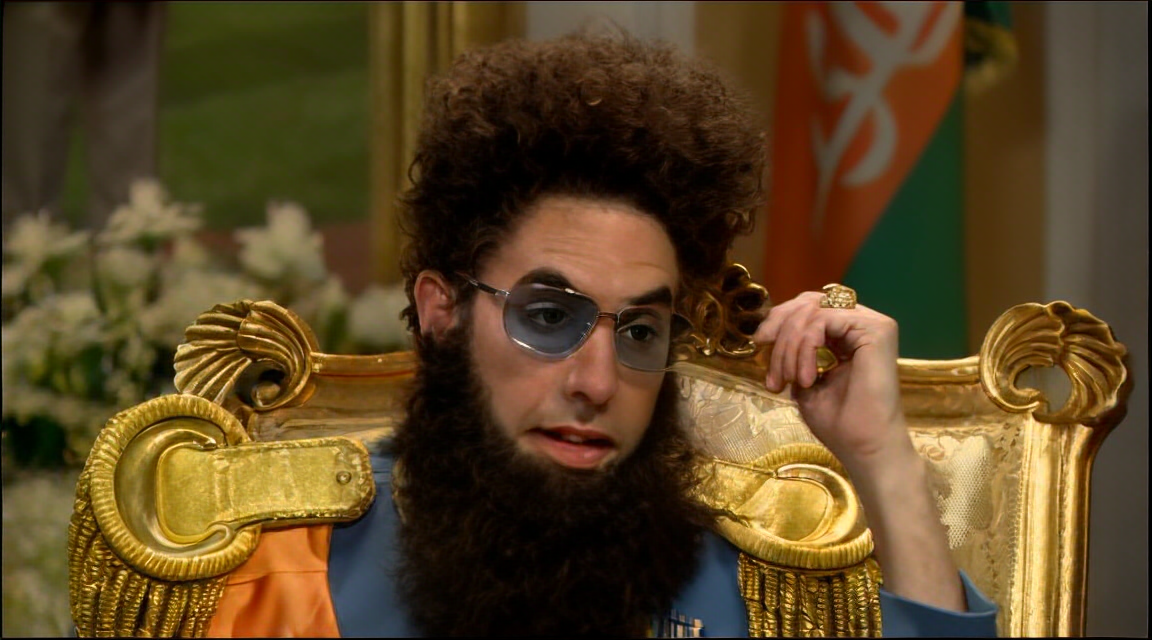

In [9]:
tokenizer.pil_from_img_toks(tokens, grid)[0]

In [10]:
t2 = tokens.clone()
t2[:, 1024:2048] = 1


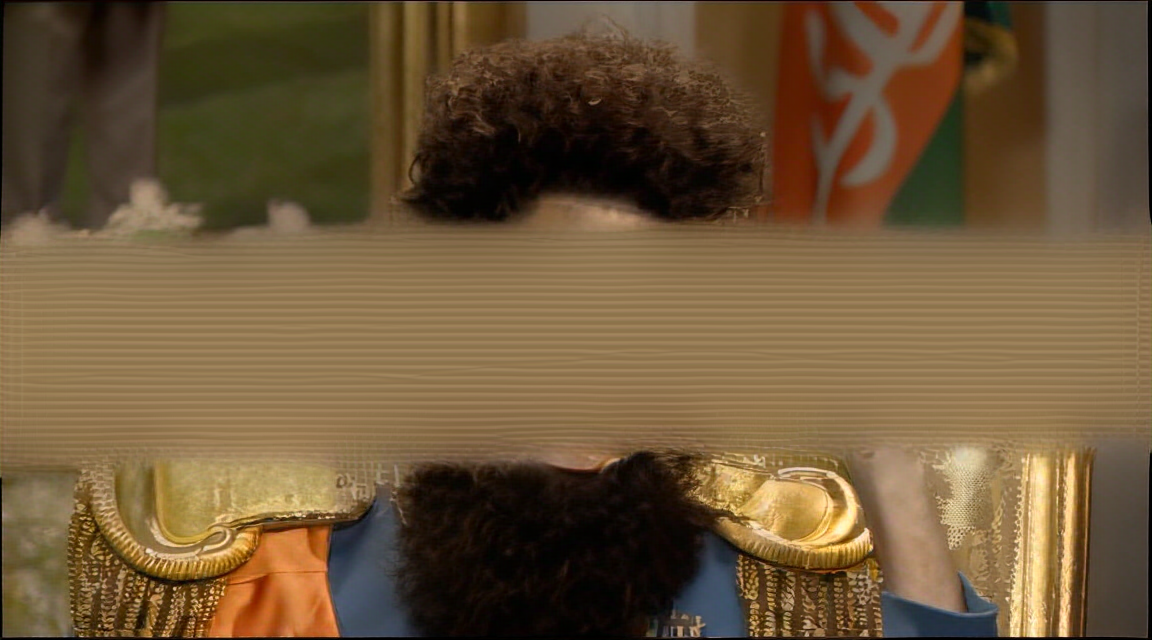

In [11]:
tokenizer.pil_from_img_toks(t2, grid)[0]